In [2]:
library(MAESTRO)
library(Seurat)
library(Signac)
library(rhdf5)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Attaching SeuratObject


Attaching package: 'Signac'


The following object is masked from 'package:Seurat':

    FoldChange




In [101]:
H3K4me1_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/H3K27ac_H3K4me1_bam/H3K4me1_merge_filtered'
H3K27ac_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/H3K27ac_H3K4me1_bam/H3K27ac_merge_filtered'

# ATAC

In [17]:
# ATAC_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/ATAC_bam/Access_merge_filtered'
# ATAC_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/data/ATAC/AdultCTX_DNA_ATAC_peaks_final.txt_mtx/'
# ATAC_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/data/ATAC/Adult_Cerebrail_Cortex/Adult_CTX_DNA'
# ATAC_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/10X/SCRIPT/imputation/mtx_imputed_H3K4me1'
ATAC_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/10X/SCRIPT/imputation/mtx_imputed_H3K27ac'
ATAC_data = Read10X(ATAC_10x_mtx_path, gene.column = 1)

In [120]:
ATAC_10x_h5_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/10X_mouse_brain/atac_v1_adult_brain_fresh_5k_filtered_peak_bc_matrix.h5'
ATAC_data = Read10X_h5(ATAC_10x_h5_path)

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


In [19]:
ATAC.res <- ATACRunSeurat(inputMat = ATAC_data,
                                 project = "ATAC",
                                 min.c = 50,
                                 min.p = 500,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//10X/SCRIPT/impute_ATAC_analysis_H3K27ac/")

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
LSI analysis ...

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

UMAP analysis ...

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
23:48:43 UMAP embedding parameters a = 0.9922 b = 1.112

23:48:43 Read 3738 rows and found 30 numeric columns

23:48:43 Using Annoy for neighbor search, n_neighbors = 30

23:48:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:48:43 Writing NN index file to temp file /tmp/Rtmpp5Mjz9/file3

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3738
Number of edges: 116449

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8959
Number of communities: 13
Elapsed time: 0 seconds


Identify cluster specific peaks ...



In [20]:
ATAC.res$ATAC

An object of class Seurat 
12519 features across 3738 samples within 1 assay 
Active assay: ATAC (12519 features, 12519 variable features)
 2 dimensional reductions calculated: lsi, umap

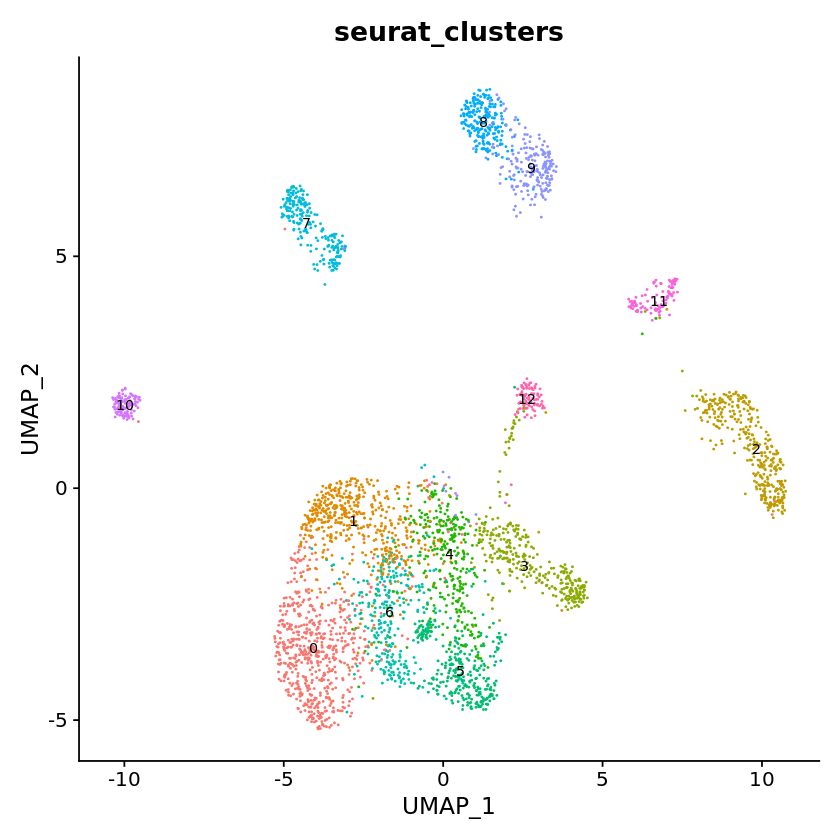

In [21]:
p <- DimPlot(object = ATAC.res$ATAC, label = TRUE, pt.size = 0.15, group.by = "seurat_clusters", label.size = 3) + NoLegend()
p

In [133]:
library(reticulate)
use_python("/fs/home/dongxin/Applications/miniconda3/envs/MAESTRO/bin/python", required = TRUE)
brain.gene <- ATACCalculateGenescore(ATAC_data, organism = "GRCm38")

In [ ]:
?ATACAnnotateCelltype

In [134]:
ATAC.res$ATAC <- ATACAttachGenescore(ATAC = ATAC.res$ATAC, RPmatrix = brain.gene)

Centering and scaling data matrix



In [136]:
data(mouse.brain.ALLEN)
ATAC.res$ATAC <- ATACAnnotateCelltype(ATAC = ATAC.res$ATAC,
                                             signatures = mouse.brain.ALLEN,
                                             min.score = 0.1,
                                             genes.test.use = "presto",
                                             genes.cutoff = 1E-5,
                                             outdir = "example//histone//peak_base//10X/ATAC_analysis/")

Identify cluster specific genes based on RP score ...



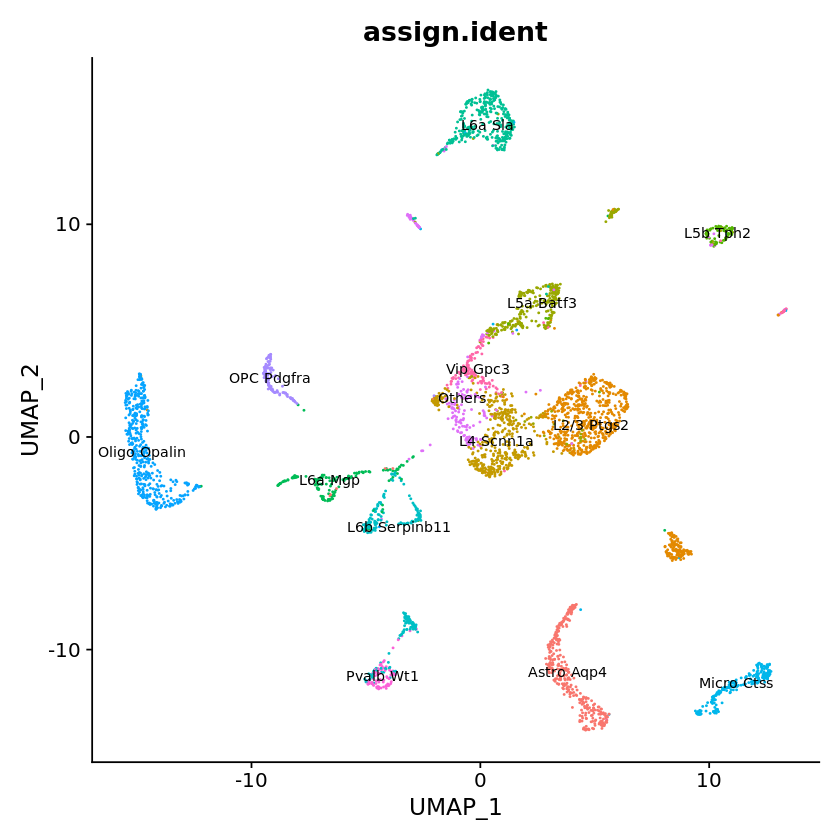

In [144]:
p <- DimPlot(object = ATAC.res$ATAC, label = TRUE, pt.size = 0.15, group.by = "assign.ident", label.size = 3) + NoLegend()
p

In [153]:
write.table(ATAC.res$ATAC@meta.data, "example/histone/peak_base/10X/ATAC_analysis/ATAC_meta_data.txt", sep = '\t', quote = FALSE)

In [148]:
ATAC.res$ATAC

An object of class Seurat 
195335 features across 3814 samples within 2 assays 
Active assay: ACTIVITY (26214 features, 2000 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

In [22]:
ATAC_SE <- as.SingleCellExperiment(ATAC.res$ATAC)

saveRDS(ATAC_SE, 'example//histone//peak_base//10X/SCRIPT/impute_ATAC_analysis_H3K27ac/ATAC_SE.rds')

In [7]:
#real 10x h5
H3K27ac_real <- readRDS('/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/GSE157637_mouse_brain/H3K27ac_seurat_object.Rds')


In [13]:
H3K27ac_real@active.assay

[1] "peaks"

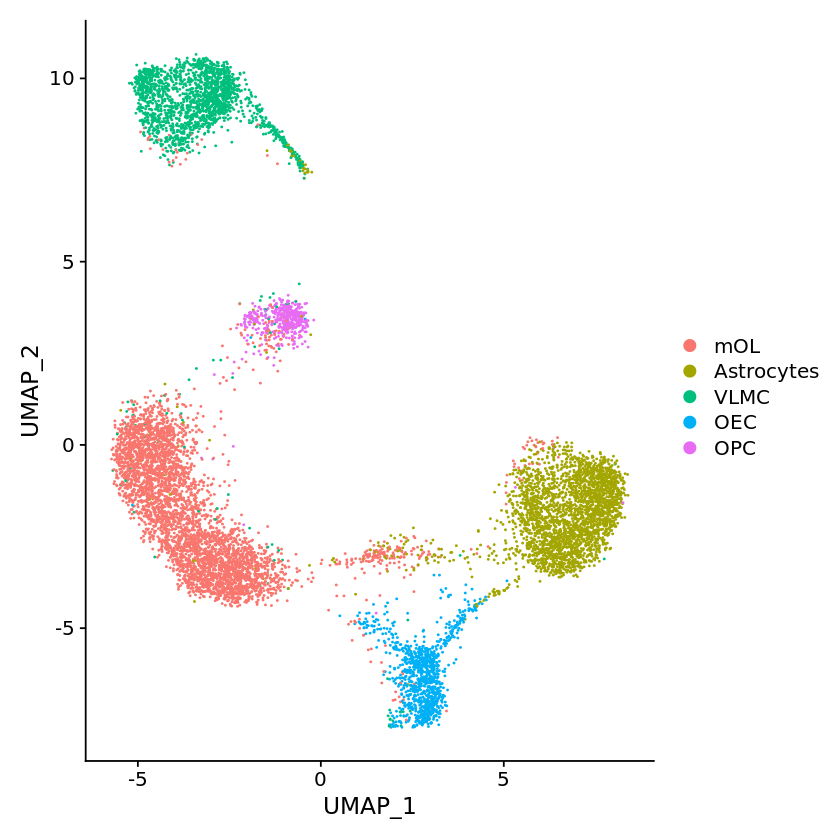

In [9]:
DimPlot(H3K27ac_real)

In [20]:
?as.SingleCellExperiment

as.SingleCellExperiment {Seurat},R Documentation
x,An object to convert to class SingleCellExperiment
...,Arguments passed to other methods
assay,Assays to convert


In [21]:
H3K27ac_real_SE <- as.SingleCellExperiment(H3K27ac_real, assay = 'peaks')

In [23]:
saveRDS(H3K27ac_real_SE, 'example/histone/peak_base/GSE157637_mouse_brain/H3K27ac_SingleCellExperiment.Rds')

In [7]:
H3K4me1_data = Read10X(H3K4me1_10x_mtx_path)

In [ ]:
H3K4me1.res <- ATACRunSeurat(inputMat = H3K4me1_data,
                                 project = "H3K4me1",
                                 min.c = 50,
                                 min.p = 500,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//H3K4me1/H3K4me1_analysis/")

In [44]:
H3K4me1.res$ATAC

An object of class Seurat 
81434 features across 10715 samples within 1 assay 
Active assay: ATAC (81434 features, 81434 variable features)
 2 dimensional reductions calculated: lsi, umap

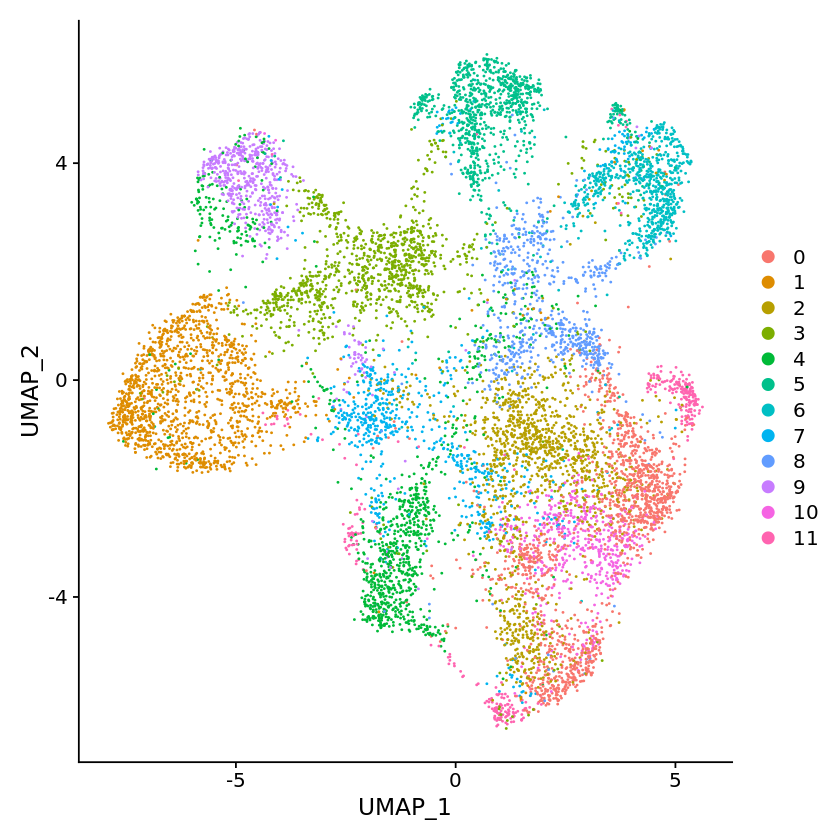

In [41]:
DimPlot(H3K4me1.res$ATAC)

In [26]:
H3K4me1_SE <- as.SingleCellExperiment(H3K4me1.res$ATAC)

saveRDS(H3K4me1_SE, 'example//histone//peak_base//H3K4me1/H3K4me1_analysis/H3K4me1_SE.rds')

In [115]:
imputated_data = Read10X('example/histone/peak_base/pairedseq/SCRIPT/imputation/mtx_imputed_H3K4me1/', gene.column = 1)

In [116]:
imputed.res <- ATACRunSeurat(inputMat = imputated_data,
                                 project = "ATAC",
                                 min.c = 5,
                                 min.p = 100,
                                 method = "LSI",
                                 dims.use = 2:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//pairedseq/SCRIPT/imputation/H3K4me1_imputation_analysis")

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
LSI analysis ...

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

UMAP analysis ...

13:00:17 UMAP embedding parameters a = 0.9922 b = 1.112

13:00:17 Read 10551 rows and found 29 numeric columns

13:00:17 Using Annoy for neighbor search, n_neighbors = 30

13:00:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:00:18 Writing NN index file to temp file /tmp/RtmpqxOokN/file24e37e2b568bea

13:00:18 Searching Annoy index using 1 thread, search_k = 3000

13:00:21 Annoy recall = 100%

13:00:23 Commencing smooth kNN distance calibration using 1 thread

13:00:25 Initializing from normalized Laplacian + noise

13:00:26 Commencing optimization for 200 epochs, wi

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10551
Number of edges: 314154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8262
Number of communities: 12
Elapsed time: 1 seconds


Identify cluster specific peaks ...



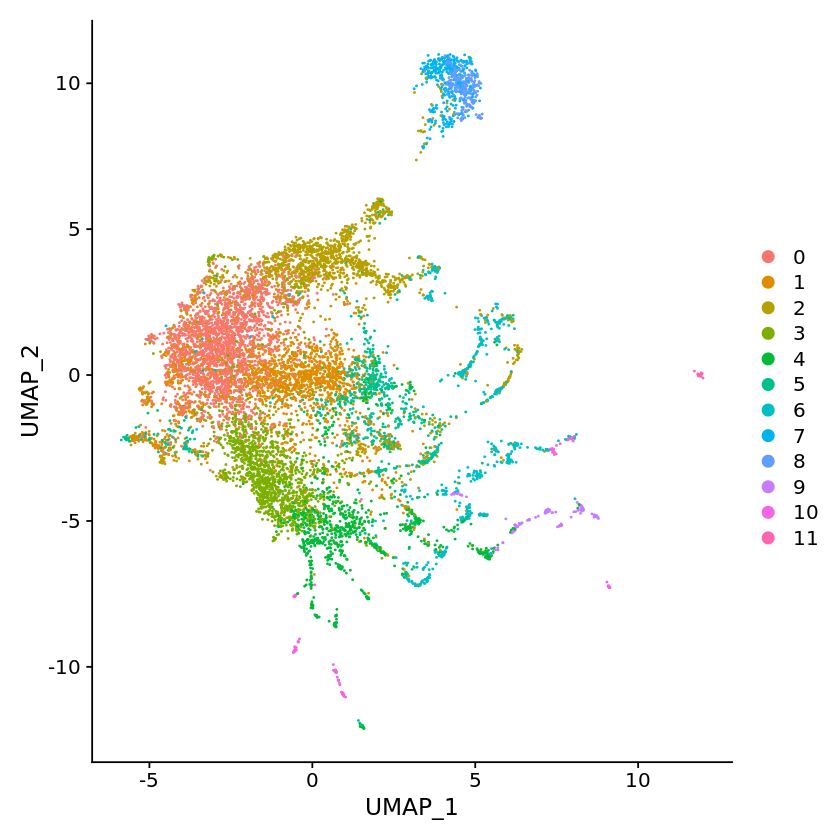

In [117]:
DimPlot(imputed.res$ATAC)

In [118]:
H3K4me1_SE <- as.SingleCellExperiment(imputed.res$ATAC)

saveRDS(H3K4me1_SE, 'example//histone//peak_base/pairedseq/SCRIPT/imputation//H3K4me1_imputation_analysis/H3K4me1_imputation_SE.rds')

In [79]:
H3K4me1_SE

class: SingleCellExperiment 
dim: 6978 10452 
metadata(0):
assays(2): counts logcounts
rownames(6978): chr10-100487238-100488119 chr10-100588810-100589428 ...
  chrY-11857986-11858368 chrY-258943-259524
rowData names(0):
colnames(10452): 51:02:14:09 51:02:14:12 ... 56:96:93:04 56:96:94:09
colData names(6): orig.ident nCount_ATAC ... seurat_clusters ident
reducedDimNames(2): LSI UMAP
altExpNames(0):

In [ ]:
H3K4me1.res

In [13]:
H3K27ac_data = Read10X(H3K27ac_10x_mtx_path)

In [ ]:
H3K27ac.res <- ATACRunSeurat(inputMat = H3K27ac_data,
                                 project = "H3K27ac",
                                 min.c = 50,
                                 min.p = 500,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//H3K27ac/H3K27ac_analysis/")

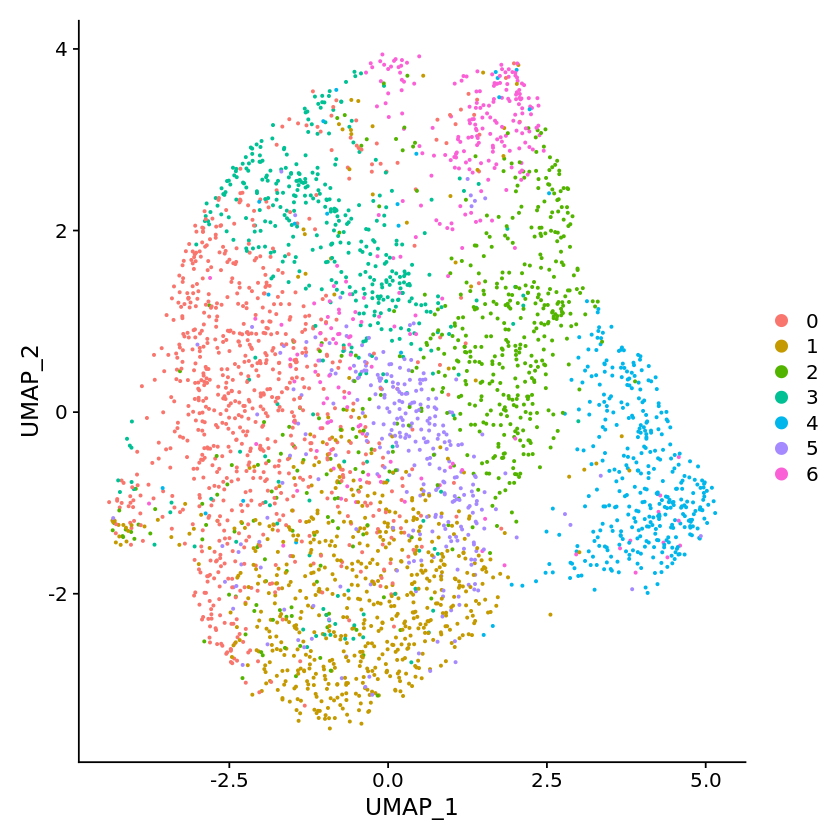

In [40]:
DimPlot(H3K27ac.res$ATAC)

In [27]:
H3K27ac_SE <- as.SingleCellExperiment(H3K27ac.res$ATAC)

saveRDS(H3K27ac_SE, 'example//histone//peak_base//H3K27ac/H3K27ac_analysis/H3K27ac_SE.rds')

# Cut&Tag Pro

## PBMC H3K27ac

In [2]:
h3k27ac_pbmc <- readRDS('example/histone/peak_base/cuttagpro/H3K27ac.rds')

In [7]:
h3k27ac_pbmc@meta.data$predicted.celltype.

[1] "Mono"    "Mono"    "Mono"    "CD8 T"   "Mono"    "Mono"    "Mono"   
    [8] "B"       "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [15] "Mono"    "B"       "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [22] "B"       "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [29] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [36] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [43] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [50] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "B"      
   [57] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [64] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [71] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [78] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [85] "Mono"    "Mono"    "Mono"    "B"       "Mono"    "Mono"    "Mono"   
   [92] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [99] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [106] "B"       "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [113] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [120] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "CD8 T"  
  [127] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [134] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [141] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [148] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [155] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [162] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [169] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [176] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "B"       "Mono"   
  [183] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [190] "Mono"    "Mono"    "B"       "Mono"    "Mono"    "Mono"    "Mono"   
  [197] "NK"      "Mono"    "Mono"    "CD4 T"   "Mono"    "B"       "Mono"   
  [204] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [211] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [218] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [225] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [232] "CD4 T"   "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [239] "CD4 T"   "B"       "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [246] "Mono"    "Mono"    "Mono"    "B"       "Mono"    "Mono"    "Mono"   
  [253] "Mono"    "Mono"    "other"   "Mono"    "Mono"    "Mono"    "Mono"   
  [260] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [267] "Mono"    "Mono"    "Mono"    "B"       "Mono"    "Mono"    "other T"
  [274] "CD4 T"   "DC"      "other T" "Mono"    "Mono"    "Mono"    "Mono"   
  [281] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [288] "Mono"    "Mono"    "B"       "Mono"    "Mono"    "Mono"    "Mono"   
  [295] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [302] "Mono"    "CD4 T"   "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [309] "Mono"    "CD4 T"   "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [316] "Mono"    "NK"      "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [323] "Mono"    "Mono"    "DC"      "Mono"    "Mono"    "Mono"    "Mono"   
  [330] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "CD4 T"  
  [337] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [344] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [351] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [358] "Mono"    "Mono"  

In [10]:
colnames(h3k27ac_pbmc@meta.data)

[1] "orig.ident"                  "nCount_ADT"                 
 [3] "nFeature_ADT"                "nCount_HTO"                 
 [5] "nFeature_HTO"                "HTO_maxID"                  
 [7] "HTO_secondID"                "HTO_margin"                 
 [9] "HTO_classification"          "HTO_classification.global"  
[11] "hash.ID"                     "ADT_snn_res.0.5"            
[13] "seurat_clusters"             "nCount_tiles"               
[15] "nFeature_tiles"              "tiles_snn_res.0.8"          
[17] "predicted.celltype.l1.score" "predicted.celltype.l1"      
[19] "predicted.celltype.l2.score" "predicted.celltype.l2"      
[21] "predicted.celltype.l3.score" "predicted.celltype.l3"      
[23] "hand_cell"                   "tiles.weight"               
[25] "ADT.weight"                  "wsnn_res.0.3"               
[27] "cellID"                      "batch"                      
[29] "integrated.weight"

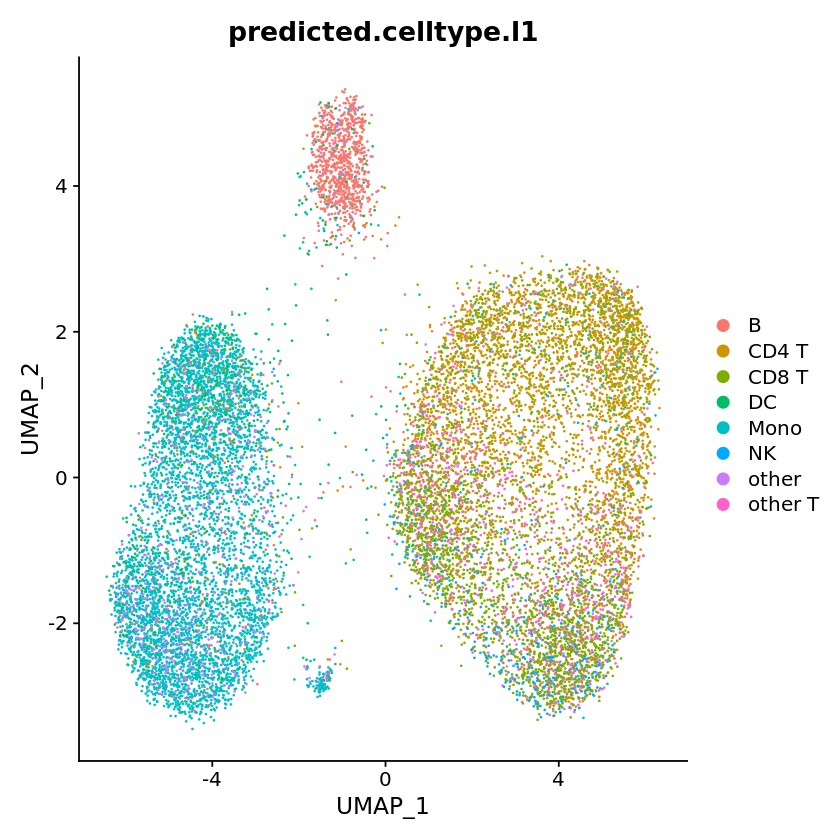

In [16]:
DimPlot(h3k27ac_pbmc, group.by = 'predicted.celltype.l1', )

In [14]:
str(h3k27ac_pbmc)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 2
  .. ..$ ADT  :Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:952139] 0 2 3 5 6 7 9 10 13 14 ...
  .. .. .. .. .. ..@ p       : int [1:15610] 0 96 188 277 360 460 557 652 766 852 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 173 15609
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:173] "CD86" "CD274" "CD270" "CD155" ...
  .. .. .. .. .. .. ..$ : chr [1:15609] "AACCTTTTCGTCCCTA-1" "TGGAAGGAGTGTCACT-1" "GTTATTCTCCAAACCA-1" "GCCATAAGTATCATGC-1" ...
  .. .. .. .. .. ..@ x       : num [1:952139] 5 3 2 36 33 1 6 6 1 28 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         : num [1:173, 1:15609] 1.043 0 0.743 0.551 0 ...
  .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. ..$ : chr [1:173] "CD86" "CD274" "CD270" "CD15